# k-means algorithm

The notebook contains the implementation of the k-means algorithm. It uses the pixel colors of an image as data ,then groups them. Two centroid initialization methods are compared, one is random, and the other is the k-means++ algorithm. FInally the image colors are reduces based on the centroids found by the k-means.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import random
from typing import List

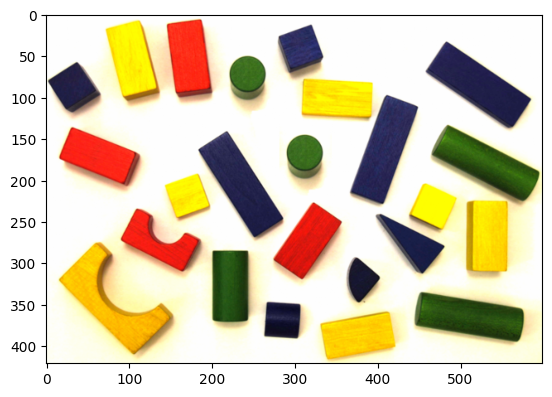

In [30]:
image=plt.imread(".\Data\\bricks.png")
plt.imshow(image)

In [31]:
def distance(point:np.array,array:np.array):
    return np.linalg.norm(array-point,axis=1)

def plot_centroids(data,centroids)->None:
    fig,axs=plt.subplots(3,1)
    size=5
    axs[0].scatter(data[:,0],data[:,1],s=size)
    axs[0].scatter(centroids[:,0],centroids[:,1],s=size)
    axs[1].scatter(data[:,1],data[:,2],s=size)
    axs[1].scatter(centroids[:,1],centroids[:,2],s=size)
    axs[2].scatter(data[:,2],data[:,0],s=size)
    axs[2].scatter(centroids[:,2],centroids[:,0],s=size)


"""
Initializes the centroids in a way, so the k-means algorithm converges faster.
"""
def initialize_centroids(data:np.array,num_centroids:int,plot_centroids:bool=True)->np.array:
    first_centroid=data[random.randint(0,data.shape[0]-1)]
    centroids=[first_centroid]
    for _ in range(num_centroids-1):
        centroid_dists_stacked=np.zeros((len(centroids),data.shape[0]))
        for i,centroid in enumerate(centroids):
            dist=distance(centroid,data)
            centroid_dists_stacked[i]=dist**2
        distribution=np.min(centroid_dists_stacked,axis=0)
        distribution=distribution/np.sum(distribution)
        new_centroid_index=np.random.choice(np.linspace(0,data.shape[0]-1,data.shape[0],dtype=np.int32),p=distribution)
        centroids.append(data[new_centroid_index])
    centroids=np.array(centroids)
    if plot_centroids:
        plot_centroids(data,centroids)
    return centroids

"""
Calculates the final postions of the centroids on the vector. If replace_data is True, the detapoints are replaced with 
the values of the corresponding centroid.
"""
def k_means(data:np.array,num_centroids:int=5,maximum_diff:float=0.0001,max_iterations:int=100,replace_data:bool=True,initialization_method:str="kpp")->np.array:
    x,y=data.shape[0],data.shape[1]
    #Reshape data
    if data.ndim==3:
        data=np.reshape(data,(data.shape[0]*data.shape[1],data.shape[-1]))
    elif data.ndim==2:
        data=np.reshape(data,(data.shape[0]*data.shape[1],1))
    #Initialize centroids with selected algorithm
    if initialization_method=="kpp":
        centroids=initialize_centroids(data,num_centroids,plot_centroids=False)
    elif initialization_method=="random":
        indices=np.random.randint(0,data.shape[0]-1,num_centroids)
        centroids=np.take(data,indices,axis=0)
    print("Centroids initialized:\n",centroids)
    #List for separating the data into groups
    groups:List[List[np.array]]=[[] for x in range(num_centroids)]
    for j in range(max_iterations):  
        #Calculate distances beetween datapoint and centroids
        centroid_dists_stacked=np.zeros((num_centroids,data.shape[0])) 
        for i,centroid in enumerate(centroids):
            dist=distance(centroid,data)
            centroid_dists_stacked[i]=dist
        #Select the minimum distance
        group_indices=np.argmin(centroid_dists_stacked,axis=0)
        #Assign elements to groups, and calculate average
        for c,ind in enumerate(group_indices):
            groups[ind].append(data[c])
        new_centroids=np.array([np.sum(members,axis=0)/len(members) for members in groups])
        #Calculate maximum difference between new and current centroids
        deltas=np.linalg.norm(new_centroids-centroids,axis=1)
        centroids=new_centroids
        groups=[[] for x in range(num_centroids)]
        print("Iteration ",j," with max difference ",max(deltas))
        if max(deltas)<=maximum_diff:
            break
    #Replace datapoints with the etalon color    
    if replace_data:
        data=replace_colors(data,centroids)

    #Reshape image to original dimensions
    data=np.reshape(data,(x,y,data.shape[-1]))
    return centroids,data

def replace_colors(data,centroids):
    centroid_dists_stacked=np.zeros((len(centroids),data.shape[0]))
    for j,centroid in enumerate(centroids):
        dist=distance(centroid,data)
        centroid_dists_stacked[j]=dist
    group_indices=np.argmin(centroid_dists_stacked,axis=0)
    return np.take(centroids,group_indices,axis=0)
        

# Random initializtaion

In [32]:
centroids,img=k_means(image,initialization_method="random")

Centroids initialized:
 [[0.99607843 0.99607843 0.99607843]
 [0.99607843 0.99607843 0.87058824]
 [0.13725491 0.14117648 0.29803923]
 [0.14901961 0.29411766 0.06666667]
 [0.99607843 0.99607843 0.99215686]]
Iteration  0  with max difference  0.3943224389856224
Iteration  1  with max difference  0.24694488028077063
Iteration  2  with max difference  0.172639876856132
Iteration  3  with max difference  0.0742280634144905
Iteration  4  with max difference  0.04553625505431997
Iteration  5  with max difference  0.04302863247885843
Iteration  6  with max difference  0.03537206731948725
Iteration  7  with max difference  0.027316877044751012
Iteration  8  with max difference  0.020757460235374302
Iteration  9  with max difference  0.018142694655450153
Iteration  10  with max difference  0.017011172560309148
Iteration  11  with max difference  0.015944531480563066
Iteration  12  with max difference  0.01342971072042436
Iteration  13  with max difference  0.011660256378385709
Iteration  14  with

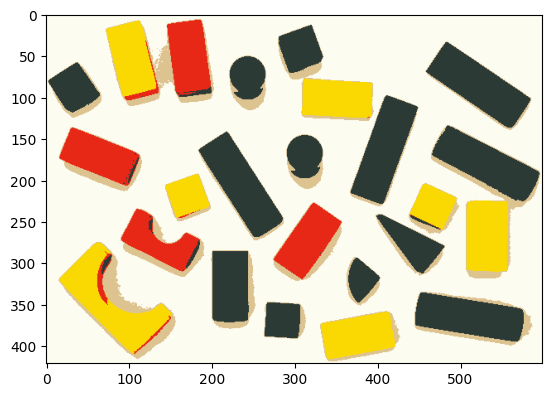

In [33]:
plt.imshow(img)

# k-means++ initialization 
Converges faster, and produces better results.

In [34]:
centroids,img=k_means(image,initialization_method="kpp")

Centroids initialized:
 [[0.99607843 0.99607843 0.99607843]
 [0.11764706 0.10588235 0.17254902]
 [0.99607843 0.8117647  0.        ]
 [0.93333334 0.69803923 0.5372549 ]
 [0.5529412  0.38039216 0.13725491]]
Iteration  0  with max difference  0.22134793365429523
Iteration  1  with max difference  0.12392855643250998
Iteration  2  with max difference  0.04927404297177902
Iteration  3  with max difference  0.022091140798688496
Iteration  4  with max difference  0.007053990508185465
Iteration  5  with max difference  0.006200585626947088
Iteration  6  with max difference  0.0054567345693926055
Iteration  7  with max difference  0.004379002653830516
Iteration  8  with max difference  0.0034706190475901825
Iteration  9  with max difference  0.0027567357513561055
Iteration  10  with max difference  0.00267437669426082
Iteration  11  with max difference  0.002245194219408234
Iteration  12  with max difference  0.001797750316984204
Iteration  13  with max difference  0.0012724306772590418
Iterati

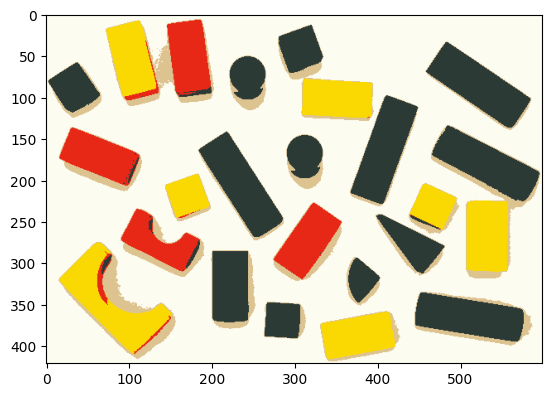

In [35]:
plt.imshow(img)